# reaction mass delta signatures

- Examples using ModelSeed universal model
- Minghao Gong, 04-14-2022


In [1]:
!pip install --upgrade metDataModel
!pip install --upgrade numpy
!pip install --upgrade mass2chem

!pip install cobra

Requirement already up-to-date: metDataModel in /opt/conda/lib/python3.7/site-packages (0.4.14)
     |████████████████████████████████| 15.7MB 9.0MB/s eta 0:00:01
  Found existing installation: numpy 1.17.2
    Uninstalling numpy-1.17.2:
      Successfully uninstalled numpy-1.17.2
Requirement already up-to-date: mass2chem in /opt/conda/lib/python3.7/site-packages (0.3.2)
  Using cached https://files.pythonhosted.org/packages/29/1c/63549e9e73ad4faa2d80700da1c8e4ca13836adc95201efa476a7387560a/cobra-0.24.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2f/d3/6a990516a43a522a72da356c4a91c03e09c0cddce8106e7e1215c120011f/httpx-0.22.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/af/8b/cee6dca4c4708705444c9cad9e783b9212cc51cab8a5e05ccfe930f53058/depinfo-1.7.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3b/00/2344469e2084fb287c2e0b57b72910309874c3245463acd6cf5e3db69324/appdirs-1.4.4-py2.py3-none-any.whl
  Us

In [2]:
import sys
sys.path.append("/Users/gongm/Documents/projects/mass2chem/")

In [3]:
import cobra
from metDataModel.core import Compound, Reaction, Pathway
from mass2chem.formula import *

## Switching to MG's JSON model

after parsing and formula-mass calculation.

Example of model conversion - ?

In [4]:
import json
from operator import itemgetter

In [5]:
# JSON models are in JMS repo
M = json.load(open('../output/ModelSeed/Universal_ModelSeed.json'))

In [6]:
M.keys() 

dict_keys(['id', 'list_of_reactions', 'list_of_compounds', 'list_of_pathways', 'meta_data'])

In [7]:
[print(x) for x in [
    M['meta_data'],
    len(M['list_of_reactions']),
    M['list_of_reactions'][222],
    len(M['list_of_compounds']),
    M['list_of_compounds'][1000], ]
]

{'species': 'universal', 'version': '', 'sources': ['https://github.com/ModelSEED/ModelSEEDDatabase/blob/master/Biochemistry/, retrieved 2022-04-13'], 'status': '', 'last_update': '20220413', 'note': 'ModelSeed Universal Model. Add all reactions and compounds, '}
38269
{'id': 'rxn00228', 'reactants': ['cpd00001', 'cpd03385'], 'products': ['cpd00009', 'cpd00029'], 'genes': [], 'enzymes': ['3.11.1.2']}
33992
{'id': 'cpd01021', 'name': 'Glu-Glu; Glutamyl-glutamic acid; L-alpha-Glutamyl-L-glutamic acid; L-glutamyl-L-glutamate; glu-glu', 'identifiers': [['KEGG', 'C01425'], ['MetaCyc', 'CPD-13219'], ['inchikey', 'KOSRFJWDECSPRO-WDSKDSINSA-L']], 'neutral_formula': 'C10H16N2O7', 'charge': -2, 'charged_formula': 'C10H14N2O7', 'neutral_mono_mass': 276.095751, 'SMILES': '[NH3+][C@@H](CCC(=O)[O-])C(=O)N[C@@H](CCC(=O)[O-])C(=O)[O-]', 'inchi': ''}


[None, None, None, None, None]

In [8]:
M['list_of_compounds'][300: 302]

[{'id': 'cpd00304',
  'name': 'Retinal; Retinene; Vitamin A aldehyde; all-trans-Retinal; all-trans-Retinene; all-trans-Vitamin A aldehyde; all-trans-retinal; all-trans-retinene; axerophthal; retinal; retinaldehyde; retinene; vitamin A aldehyde',
  'identifiers': [['AraCyc', 'RETINAL'],
   ['BiGG', 'retinal'],
   ['BrachyCyc', 'RETINAL'],
   ['KEGG', 'C00376'],
   ['MetaCyc', 'RETINAL'],
   ['inchikey', 'NCYCYZXNIZJOKI-OVSJKPMPSA-N']],
  'neutral_formula': 'C20H28O',
  'charge': 0,
  'charged_formula': 'C20H28O',
  'neutral_mono_mass': 284.214016,
  'SMILES': 'CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=O)C(C)(C)CCC1',
  'inchi': ''},
 {'id': 'cpd00305',
  'name': 'Aneurin; Antiberiberi factor; THI; Thiamin; Thiamine; Vitamin B1; thiamin; thiamine; vitamin B1',
  'identifiers': [['AraCyc', 'THIAMINE'],
   ['BiGG', 'thm'],
   ['BrachyCyc', 'THIAMINE'],
   ['KEGG', 'C00378'],
   ['MetaCyc', 'THIAMINE'],
   ['inchikey', 'JZRWCGZRTZMZEH-UHFFFAOYSA-N']],
  'neutral_formula': 'C12H16N4OS',
  'charge': 1,


In [9]:
# index metabolites, and add calculated charged_formula_mass via mass2chem.formula.calculate_formula_mass
cpdDict = {}
for C in M['list_of_compounds']:
    if C['neutral_mono_mass']:
        cpdDict[C['id']] = C
    else:
        print(C['id'], C['charged_formula'])

cpd00049 CO2R
cpd00057 HOR
cpd00109 C42H42FeN8O8R4S2
cpd00110 C42H42FeN8O8R4S2
cpd00124 C5H9O7PR
cpd00148 C5H8O7PR
cpd00167 C19H36NO3R
cpd00173 C5H9O13P3R
cpd00181 C53H82CoN11O14PR2
cpd00195 CH3OR
cpd00354 C5H9O10P2R
cpd00375 C7H6NOR
cpd00410 C42H42FeN8O8R4S2
cpd00431 C24H48N2O6PR
cpd00459 C10H15NO9R
cpd00468 C5H8O6PR
cpd00487 C3H4O2R
cpd00512 C5H8O6PR
cpd00513 C5H8O6PR
cpd00514 C5H9O12P3R
cpd00542 CNR
cpd00560 W
cpd00595 C5H9O4R
cpd00676 C5H9O4R
cpd00710 C6H11O6R
cpd00716 C3H2O3R
cpd00748 C5H8O7PR
cpd00753 C3H6NO2R
cpd00783 C19H26N4O16PR
cpd00821 C5H8O7PR
cpd00839 C6H11O6R
cpd00846 C5H9O7PR
cpd00878 C25H46NO8R
cpd00883 C10H14NO12PR
cpd00889 C7H14N3O3R2
cpd00913 C5H7O6PR
cpd00941 C27H51NO8PR
cpd00947 C31H56NO13R
cpd00959 C20H34NO15R
cpd00970 C5H8O7PR
cpd00975 HgR
cpd00987 C11H11N2O2R
cpd01039 C8H10N4O3R
cpd01125 C11H18O14P2R2
cpd01226 C6H13NO2R
cpd01236 C54H69MgN4O5R
cpd01240 C6H11O6R
cpd01248 C2H2O2R
cpd01297 C4H7O4R
cpd01299 H3NR
cpd01305 C31H43O8R
cpd01315 C6H11O6R
cpd01323 C2HO2R
c

cpd12280 None
cpd12281 None
cpd12282 None
cpd12283 None
cpd12284 None
cpd12285 C26H36N6O18P2R2S
cpd12286 C21H43N5O8R2
cpd12287 None
cpd12288 C2H4NO3R
cpd12289 None
cpd12290 C5H5N2O4R2
cpd12291 None
cpd12292 C7H14N5O2R2
cpd12293 C2H4NO2R2
cpd12294 C7H14N3O2R2
cpd12295 None
cpd12297 C11H12N5O8PR
cpd12298 C7H10N2O5R
cpd12299 C5H4N2O3R4S
cpd12300 C4H4O7PR
cpd12301 None
cpd12302 None
cpd12303 None
cpd12304 None
cpd12305 None
cpd12306 None
cpd12307 None
cpd12308 C21H28N5O16P3R2
cpd12309 None
cpd12310 None
cpd12311 None
cpd12312 C6H11O6R
cpd12313 C19H29N2O18P2R3
cpd12314 C31H55NO16RS
cpd12315 None
cpd12317 None
cpd12318 C7H14N3O3R2
cpd12319 C6H11O6R
cpd12320 C6H2NO3R2S
cpd12321 C20H28N2O21P3R2
cpd12322 C6H8O4R2
cpd12323 C23H47N4O17PR
cpd12324 C24H49N5O13PR
cpd12325 C15H22O19P3R3
cpd12326 C15H22O19P3R3
cpd12327 None
cpd12328 None
cpd12329 None
cpd12330 None
cpd12331 C7H13OR
cpd12332 H2O2PR
cpd12333 HO3PR
cpd12334 None
cpd12335 C24H33NO17P2R3
cpd12336 C31H38N7O17P2R2
cpd12337 HO7P2R
cpd12338 C3

cpd14645 None
cpd14646 C47H63O7R
cpd14647 None
cpd14649 None
cpd14650 None
cpd14651 None
cpd14658 None
cpd14660 None
cpd14664 None
cpd14666 None
cpd14671 None
cpd14672 None
cpd14673 None
cpd14674 None
cpd14675 None
cpd14676 None
cpd14684 None
cpd14685 None
cpd14686 None
cpd14699 C13H24NO2RS2
cpd14703 C13H24NO2RS2
cpd14717 None
cpd14722 None
cpd14725 None
cpd14726 None
cpd14727 None
cpd14728 None
cpd14729 None
cpd14731 None
cpd14732 None
cpd14733 C22H33N10O15P2R2
cpd14734 None
cpd14735 None
cpd14738 None
cpd14739 None
cpd14740 None
cpd14741 None
cpd14742 None
cpd14743 None
cpd14744 None
cpd14745 None
cpd14746 None
cpd14747 None
cpd14748 None
cpd14750 None
cpd14751 None
cpd14752 None
cpd14753 None
cpd14754 None
cpd14755 None
cpd14756 None
cpd14757 None
cpd14758 None
cpd14760 None
cpd14761 None
cpd14762 None
cpd14763 None
cpd14764 None
cpd14765 None
cpd14766 None
cpd14767 None
cpd14768 None
cpd14769 None
cpd14770 None
cpd14771 None
cpd14772 None
cpd14773 None
cpd14774 None
cpd14775 None
c

cpd19195 C7H14N3O2R2
cpd19197 None
cpd19250 None
cpd19251 None
cpd19276 None
cpd19395 C7H12NO9PR
cpd19396 C7H13O9PR
cpd19399 C12H17O16P2R3
cpd19414 None
cpd19429 None
cpd19430 C30H25MgN4O4R2
cpd19431 C31H27MgN4O4R2
cpd19432 C45H50MgN4O4R2
cpd19433 C46H52MgN4O4R2
cpd19438 C9H13NO7R2
cpd19439 C12H19NO7R2
cpd19451 None
cpd19452 None
cpd19453 None
cpd19454 None
cpd19455 None
cpd19456 None
cpd19457 None
cpd19458 None
cpd19459 None
cpd19460 None
cpd19466 None
cpd19467 None
cpd19468 None
cpd19469 None
cpd19470 None
cpd19476 None
cpd19477 None
cpd19478 None
cpd19499 None
cpd19500 None
cpd19553 None
cpd19554 None
cpd19555 None
cpd19556 None
cpd19557 None
cpd19558 None
cpd19559 C19H18NO8RS
cpd19560 C19H14NO6RS
cpd19579 None
cpd19592 C16H17O8RS
cpd19593 C16H19O8RS
cpd19594 C16H15O6RS
cpd19595 C20H21O10RS
cpd19596 C20H23O10RS
cpd19597 C20H19O8RS
cpd19598 C21H23O10RS
cpd19599 C21H25O10RS
cpd19600 C21H21O8RS
cpd19601 C20H19O9RS
cpd19602 C20H17O8RS
cpd19618 C16H13O5R
cpd19620 C16H15O5RS
cpd19622 C16H

cpd23001 C2H4NO2R
cpd23012 C16H21N5O10P2R2S
cpd23013 C16H21N5O11P2R2S
cpd23022 None
cpd23036 C20H24N4O18P3R2
cpd23037 C20H24N4O18P3R2
cpd23039 None
cpd23041 C20H24N4O18P3R2
cpd23042 C18H18N4O18P3R4
cpd23064 None
cpd23065 None
cpd23067 None
cpd23068 None
cpd23152 C25H35N4O12PR2S
cpd23154 C21H30N3O11PR2S
cpd23182 Pt
cpd23226 C24H35N4O11PR2S2
cpd23227 C17H32N4O9PR2S2
cpd23228 C24H33N4O10PR2S2
cpd23229 C27H36N5O10PR2S3
cpd23230 C27H38N5O10PR2S3
cpd23231 C28H40N5O10PR2S3
cpd23232 C17H32N4O9PR2S2
cpd23241 None
cpd23242 None
cpd23243 None
cpd23269 C15H17N3O4R4
cpd23270 C22H18N4O4R4
cpd23271 C12H12N2O3R4S
cpd23362 C28H43N10O15P2R2
cpd23379 None
cpd23380 None
cpd23381 None
cpd23418 None
cpd23442 C14H13N3O4R4S
cpd23507 C4H4O3R
cpd23590 C38H35FeN6O6R2S
cpd23642 None
cpd23655 C19H17O8R
cpd23672 C7H9O6R
cpd23673 C6H6O6R
cpd23674 C6H6O6R
cpd23676 C12H14O13R2
cpd23677 C6H6O6R
cpd23681 C6H8N2O5R
cpd23691 C24H36O31R2S4
cpd23722 C39H69N2O18R
cpd23723 C45H79N2O23R
cpd23750 None
cpd23753 C30H34O4R2
cpd237

cpd27645 C94H152N8O26P2R
cpd27647 C11H16O12P2R2
cpd27648 C11H16O12P2R2
cpd27649 C11H14O12P2R2
cpd27650 C11H16O13P2R2
cpd27651 C11H18O12P2R2
cpd27652 C11H18O14P2R2
cpd27653 C11H18O14P2R2
cpd27658 C18H33N4O3R
cpd27659 C16H29N4O3R2
cpd27660 None
cpd27661 C17H32N4O3R2
cpd27662 None
cpd27663 None
cpd27664 None
cpd27667 None
cpd27668 C24H37O19R
cpd27669 C18H30O16R2
cpd27670 CNR
cpd27671 NO2R
cpd27672 None
cpd27673 None
cpd27674 HR
cpd27675 CHNO4RS2
cpd27676 HOR
cpd27677 HOR
cpd27678 HR
cpd27679 H3NR
cpd27680 HOR
cpd27681 None
cpd27682 None
cpd27683 None
cpd27684 HR
cpd27685 C5H8O9P2R2
cpd27686 C5H7O6PR2
cpd27687 C5H8O12P3R2
cpd27688 C5H8O3R2
cpd27689 C5H6O3R4
cpd27690 C8H14NO4R
cpd27691 None
cpd27692 C9H15NO7R3
cpd27694 C25H41O6R
cpd27695 C4H5N2O3R4
cpd27697 C9H14NO2R
cpd27698 C9H14NO2R
cpd27700 C31H39N12O26P4R
cpd27701 C24H38O27P2R2
cpd27702 None
cpd27704 None
cpd27705 HO6P2R
cpd27706 C80H131O7P2R
cpd27707 C2HO3R
cpd27708 C2H3O3R
cpd27709 C11H18N2O5R2
cpd27711 None
cpd27713 C14H27N2O2R2
cpd

cpd28537 None
cpd28538 None
cpd28539 None
cpd28540 C15H21O19P3R5
cpd28541 None
cpd28542 C9H10N2O11P2R2S
cpd28543 C10H11N5O10P2R2
cpd28544 C10H11N5O10P2R2
cpd28545 C10H11N5O10P2R2
cpd28546 C10H11N5O10P2R2
cpd28547 C10H10N4O11P2R2
cpd28548 C11H16N3O11P2R2S
cpd28549 C15H19N5O10P2R2
cpd28550 C11H13N5O10P2R2
cpd28551 C11H13N5O10P2R2
cpd28552 C11H13N5O10P2R2
cpd28553 C11H13N5O11P2R2
cpd28554 C11H13N5O11P2R2
cpd28555 C24H30N10O18P3R2
cpd28556 C23H28N10O18P3R2
cpd28557 C22H26N10O18P3R2
cpd28558 C21H24N10O18P3R2
cpd28559 C11H13N5O11P2R2
cpd28560 C11H13N5O11P2R2
cpd28561 C11H13N5O11P2R2
cpd28562 C12H15N5O11P2R2
cpd28563 C12H15N5O11P2R2
cpd28564 C11H14N5O11P2R2
cpd28565 None
cpd28566 C9H12N2O12P2R2
cpd28567 C15H21O19P3R5
cpd28568 None
cpd28569 None
cpd28570 C10H12N2O12P2R2
cpd28571 C12H11N5O11P2R2
cpd28572 C12H15N6O11P2R2
cpd28573 C12H15N3O13P2R2S
cpd28574 C10H12N2O12P2R2
cpd28575 C10H11N5O11P2R2
cpd28576 C10H14O16P3R4
cpd28577 C9H10N2O12P2R2
cpd28578 C9H10N2O12P2R2
cpd28579 C9H10N2O12P2R2
cpd285

cpd30041 None
cpd30042 None
cpd30043 None
cpd30044 None
cpd30045 None
cpd30046 None
cpd30047 None
cpd30048 None
cpd30049 None
cpd30050 None
cpd30051 None
cpd30052 None
cpd30053 None
cpd30054 None
cpd30055 None
cpd30056 None
cpd30057 None
cpd30058 None
cpd30061 None
cpd30062 None
cpd30064 None
cpd30066 None
cpd30067 None
cpd30068 None
cpd30070 None
cpd30071 None
cpd30072 None
cpd30074 None
cpd30083 None
cpd30084 None
cpd30085 None
cpd30087 None
cpd30116 None
cpd30117 None
cpd30118 None
cpd30119 None
cpd30120 None
cpd30121 None
cpd30122 None
cpd30123 None
cpd30125 None
cpd30126 None
cpd30127 None
cpd30128 None
cpd30129 None
cpd30130 None
cpd30131 None
cpd30132 None
cpd30133 None
cpd30134 None
cpd30165 None
cpd30166 None
cpd30167 None
cpd30168 None
cpd30169 None
cpd30170 None
cpd30171 None
cpd30172 None
cpd30173 None
cpd30174 None
cpd30175 None
cpd30176 None
cpd30177 None
cpd30178 None
cpd30179 None
cpd30180 None
cpd30181 None
cpd30191 None
cpd30192 None
cpd30199 None
cpd30201 None
cpd302

cpd36289 C17H32N4O9PR2S
cpd36290 C20H34NO15R
cpd36291 C9H13N3O3R3
cpd36292 C8H16N3O3R2
cpd36293 C31H55N2O8PRS
cpd36294 FeR
cpd36295 C21H30N3O10PR2S
cpd36296 C5H7O9P2R2
cpd36297 None
cpd36298 C18H31O15R
cpd36299 None
cpd36301 C8H18N4OR2
cpd36302 C6H8N3O3R4
cpd36303 C5H8NO3R
cpd36304 C11H18NO11PR2
cpd36305 C4H5N2O3R3
cpd36306 C8H10NO5R3S
cpd36307 C5H8N2O2R3S
cpd36308 C56H93N4O42R2
cpd36309 C30H18O9R9
cpd36310 C16H30N4O9PR2S
cpd36311 C30H51O4R2
cpd36312 C76H144O5R4
cpd36313 C18H34N4O10PR2S
cpd36314 None
cpd36315 C19H34N4O9PR2S
cpd36316 C2H5NOR
cpd36317 C4H6N2O2R3
cpd36318 C6H14N2O2R2
cpd36319 C65H107N6O45R2
cpd36320 C16H29OR
cpd36322 None
cpd36323 C8H10N4O5R5
cpd36324 C32H52N4O22R
cpd36325 None
cpd36326 C14H20N2O3RS
cpd36327 C6H8N2O4R2
cpd36328 C31H50N2O23R
cpd36329 C14H16NO6R
cpd36331 C26H42O8R2
cpd36332 C39H66N3O10PR2S
cpd36333 C47H79N7O17P3RS
cpd36334 C2H2R2
cpd36336 C24H38O25R2S2
cpd36337 None
cpd36338 C62H103N4O47R2
cpd36339 None
cpd36340 C28H50O5R
cpd36341 C19H29N4O9PR2S
cpd36342 C3

In [14]:
len(cpdDict)

26051

In [15]:
cpdDict.get('cpd00783', None)

In [16]:
M['list_of_reactions'][891]

{'id': 'rxn00910',
 'reactants': ['cpd00006', 'cpd00345'],
 'products': ['cpd00005', 'cpd00125'],
 'genes': [],
 'enzymes': ['1.5.1.20']}

In [17]:
def get_delta(tuple1, tuple2):
    # tuple1,2 are (mass, formula)
    # get diff of mass and formulas. tuple2 as from products.
    # return (mdiff, formulaDiff, tuple1[1], tuple2[1])
    
    F1, F2 = tuple1[1], tuple2[1]
    mdiff = tuple2[0] - tuple1[0]
    if tuple1[0] <= tuple2[0]:
        F2, F1 = tuple1[1], tuple2[1]
        
    # F1 is the larger
    F1dict, F2dict = parse_chemformula_dict(F1), parse_chemformula_dict(F2)
    # invert F2 and calculate differential formula
    for k,v in F2dict.items():
        F2dict[k] = -v
    formulaDiff = add_formula_dict( F1dict, F2dict )
    if formulaDiff:
        formulaDiff = dict_to_hill_formula(formulaDiff)
    
    return (mdiff, formulaDiff, tuple1[1], tuple2[1])
    

In [18]:
# get useful rxns
# signature_mass_diff is the mass shift btw all products and all reactants
good = []
for R in M['list_of_reactions']:
    if R['products'] and R['reactants']:
        for C1 in R['reactants']:
            for C2 in R['products']:
                if C1 != C2:
                    D1 = cpdDict.get(C1, None)
                    D2 = cpdDict.get(C2, None)
                    if D1 and D2: 
                        diff = get_delta((D1['neutral_mono_mass'], D1['neutral_formula']),
                                         (D2['neutral_mono_mass'], D2['neutral_formula'])
                                        )
                        good.append((R['id'], diff))
                        R['signature_mass_diff'] = diff[0]
                        R['signature_formula_diff'] = diff[1]
            
print(len(good))

132622


In [19]:
good[40:60]

[('rxn00019', (-42.04695, 'C3H6', 'C3H7NO2', 'HNO2')),
 ('rxn00019', (-31.005813000000003, 'HNO', 'C3H7NO2', 'C3H6O')),
 ('rxn00020', (162.052823, 'C6H10O5', 'H2O', 'C6H12O6')),
 ('rxn00020', (-162.05282400000002, 'C6H10O5', 'C12H22O11', 'C6H12O6')),
 ('rxn00021', (-106.041865, 'C7H6O', 'C14H12O2', 'C7H6O')),
 ('rxn00022', (162.052823, 'C6H10O5', 'H2O', 'C6H12O6')),
 ('rxn00022', (-162.05282400000002, 'C6H10O5', 'C12H22O11', 'C6H12O6')),
 ('rxn00023', (111.928886, 'O3S2', 'H2O3S2', 'H2O6S4')),
 ('rxn00024', (165.078979, 'C9H11NO2', 'O2', 'C9H11NO4')),
 ('rxn00024', (15.994914999999992, 'O', 'C9H11NO3', 'C9H11NO4')),
 ('rxn00025', (252.22418700000003, None, 'O2', 'C20H28O')),
 ('rxn00025', (-252.22418600000003, None, 'C40H56', 'C20H28O')),
 ('rxn00026', (2.015650000000001, 'H2', 'O2', 'H2O2')),
 ('rxn00026', (230.09900300000004, None, 'O2', 'C12H14N4OS')),
 ('rxn00026', (-230.099003, None, 'C12H16N4OS', 'H2O2')),
 ('rxn00026', (-2.0156499999999937, 'H2', 'C12H16N4OS', 'C12H14N4OS')),
 (

In [20]:
def add_formula_dict2(dict1, dict2):
    '''
    Addition of two formulae as dictionaries.
    This allows calculating formula after a reaction, as dict2 can contain substraction of elements.
    Not as good as using real chemical structures, just a simple approximation.
    '''
    new, result = {}, {}
    for k in set(dict1.keys()).union( set(dict2.keys()) ):
        if k in dict1 and k in dict2:
            new[k] = dict1[k] + dict2[k]
        elif k in dict1:
            new[k] = dict1[k]
        else:
            new[k] = dict2[k]
    for k,v in new.items():
        if v != 0:
            result[k] = v
    return result

In [21]:
good2 = []
for line in good:
    rid, DD = line
    if DD[0] != 0:
        F1, F2 = DD[2:4]
        F1dict, F2dict = parse_chemformula_dict(F1), parse_chemformula_dict(F2)
        for k,v in F2dict.items():
            F2dict[k] = -v
        formula_d = add_formula_dict2(F1dict, F2dict)
        good2.append(
        [rid] + [x for x in DD] + [str(formula_d)]
        )
    
print(len(good2))

131266


In [22]:
good2[88:93]

[['rxn00038',
  86.036779,
  'C4H6O2',
  'H2O',
  'C4H8O3',
  "{'C': -4, 'O': -2, 'H': -6}"],
 ['rxn00038',
  -86.03678000000001,
  'C4H6O2',
  'C8H14O5',
  'C4H8O3',
  "{'C': 4, 'O': 2, 'H': 6}"],
 ['rxn00039',
  -152.01095899999999,
  'C7H4O4',
  'C13H16O10',
  'C6H12O6',
  "{'C': 7, 'O': 4, 'H': 4}"],
 ['rxn00039',
  152.01095800000002,
  'C7H4O4',
  'C13H16O10',
  'C20H20O14',
  "{'C': -7, 'O': -4, 'H': -4}"],
 ['rxn00040',
  152.01095800000002,
  'C7H4O4',
  'H2O',
  'C7H6O5',
  "{'C': -7, 'O': -4, 'H': -4}"]]

In [23]:
# combine +/- values
all_mds = [str(round(abs(x[1]),4)) for x in good2]
print(len(all_mds), len(set(all_mds)))

131266 14035


In [24]:
# so there's 5556 mz_diffs. because all mass were calculated from same source, bin in 0.0002 okay
# make a dict of mz_diff to reaction IDs
mzdiff_dict = {}
for k in set(all_mds):
    mzdiff_dict[k] = []
    for x in good2:
        if abs(abs(x[1])-float(k)) < 0.0002:
            mzdiff_dict[k].append(x[0])
    

In [25]:
list(mzdiff_dict.items())[88:90]

[('1271.3391', ['rxn10531']),
 ('206.0691', ['rxn03362', 'rxn03362', 'rxn45594', 'rxn45594'])]

In [26]:
freq = list(zip(mzdiff_dict.keys(), [len(set(v)) for k,v in mzdiff_dict.items()]))
freq.sort(reverse=True, key=itemgetter(1))

In [27]:
from matplotlib import pyplot as plt

In [28]:
freq[500]

('328.2038', 21)

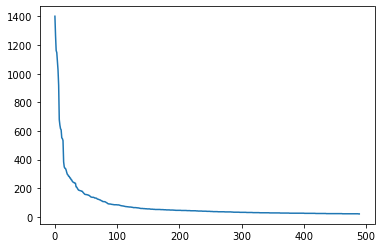

In [29]:
plt.plot([x[1] for x in freq[10:500]] )

In [30]:
freq[:40]

[('2.0157', 10614),
 ('2.0156', 10614),
 ('15.9949', 4110),
 ('13.9793', 4075),
 ('79.9665', 2804),
 ('79.9663', 2802),
 ('162.0528', 2463),
 ('727.0805', 1901),
 ('14.0157', 1770),
 ('14.0156', 1770),
 ('711.0856', 1401),
 ('18.0106', 1266),
 ('329.0525', 1162),
 ('159.9327', 1147),
 ('647.1142', 1091),
 ('42.0106', 1025),
 ('0.984', 919),
 ('1.0316', 679),
 ('409.0189', 641),
 ('749.1046', 616),
 ('12.0', 608),
 ('631.1193', 552),
 ('43.9898', 547),
 ('27.9949', 533),
 ('86.0004', 384),
 ('203.0794', 349),
 ('86.0368', 340),
 ('102.0317', 338),
 ('809.1258', 327),
 ('129.0426', 310),
 ('701.1013', 297),
 ('31.9898', 293),
 ('420.0521', 284),
 ('79.9568', 283),
 ('204.1878', 272),
 ('589.172', 271),
 ('132.0423', 260),
 ('68.0626', 258),
 ('177.9432', 248),
 ('22.0241', 244)]

In [31]:
freq[199], mzdiff_dict[freq[199][0]]

(('58.0419', 48),
 ['rxn00030',
  'rxn00671',
  'rxn00734',
  'rxn00995',
  'rxn01131',
  'rxn01709',
  'rxn02848',
  'rxn02848',
  'rxn03478',
  'rxn03610',
  'rxn03979',
  'rxn04000',
  'rxn04014',
  'rxn04015',
  'rxn04563',
  'rxn05940',
  'rxn06859',
  'rxn08043',
  'rxn08043',
  'rxn10589',
  'rxn11394',
  'rxn11675',
  'rxn12090',
  'rxn12777',
  'rxn12823',
  'rxn13006',
  'rxn13496',
  'rxn14178',
  'rxn15094',
  'rxn15324',
  'rxn15325',
  'rxn15734',
  'rxn17398',
  'rxn19028',
  'rxn19030',
  'rxn19030',
  'rxn23640',
  'rxn24440',
  'rxn25253',
  'rxn25599',
  'rxn27665',
  'rxn27667',
  'rxn27667',
  'rxn30333',
  'rxn30333',
  'rxn35548',
  'rxn40600',
  'rxn43674',
  'rxn43989',
  'rxn45568',
  'rxn45568',
  'rxn46173',
  'rxn48129',
  'rxn48474'])

In [32]:
fil = [x for x in freq if 2 < float(x[0]) < 100]
print(len(fil))
print(len([x for x in fil if x[1] > 5]))

2084
474


## With 14035 mass diff, 2084 are within (2, 100) amu

and 

474 occurs more than 5 times

In [33]:
s = json.JSONEncoder().encode( mzdiff_dict )
with open("ModelSeed_universal_signatures_dict.json", "w") as O:
    O.write(s)